In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/calcofi/bottle.csv
/kaggle/input/calcofi/cast.csv


# Load the data

In [13]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

bottle = pd.read_csv('/kaggle/input/calcofi/bottle.csv',low_memory=False)

# Selecting relevant information and cleaning

In [16]:
bottle =bottle.rename(columns={'Salnty': 'Salinity per thounsand','T_degC' : 'Water temprature in celcius'})
bottle= bottle[["Salinity per thounsand",'Water temprature in celcius']]


bottle= bottle[bottle["Salinity per thounsand"].notna() & bottle["Water temprature in celcius"].notna()]
bottle.head()

In [17]:
bottle.describe()

,Salinity per thounsand,Water temprature in celcius
count,814247.000000,814247.000000
mean,33.841337,10.860287
std,0.461636,4.224930
min,28.431000,1.440000
25%,33.489000,7.750000
50%,33.866000,10.110000
75%,34.197000,13.930000
max,37.034000,31.140000


# Looking for insights

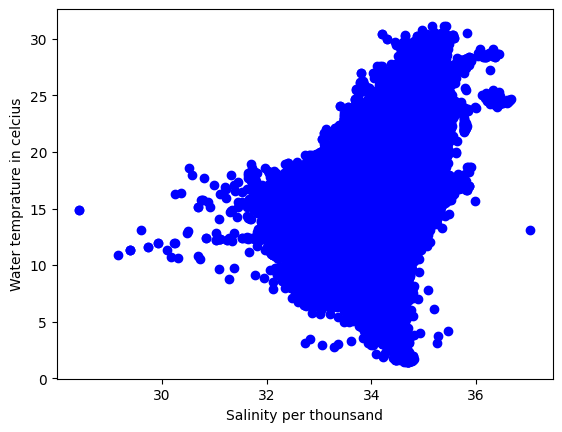

In [18]:
X=bottle[['Salinity per thounsand']]
y=bottle[['Water temprature in celcius']]
plt.scatter(X,y,color="blue")
plt.xlabel("Salinity per thounsand")
plt.ylabel("Water temprature in celcius")
plt.show()

# Modeling

0.2560046880327157


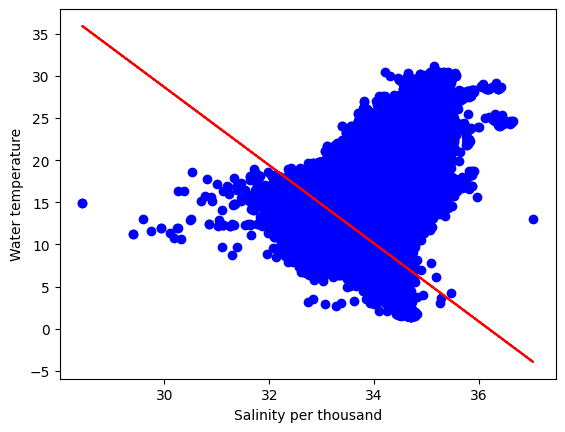

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.80, test_size=0.20, random_state=42)

model= LinearRegression().fit(X_train,y_train)

predict=model.predict(X_train)

print(model.score(X_train,y_train))

plt.scatter(X_train,y_train,color="blue")
plt.plot(X_train,predict,color="red")
plt.xlabel("Salinity per thousand")
plt.ylabel("Water temperature")
plt.title('Lineal Regresion with training data')
plt.show()


# Test

In [40]:
test= LinearRegression().fit(X_train,y_train)
y_predict= test.predict(X_test)
print(f"Train accuracy {round(test.score(X_train, y_train)*100,2)}%" )
print(f"Test accuracy {round(test.score(X_test, y_test)*100,2)}%" )

Train accuracy 25.6%
Test accuracy 25.24%


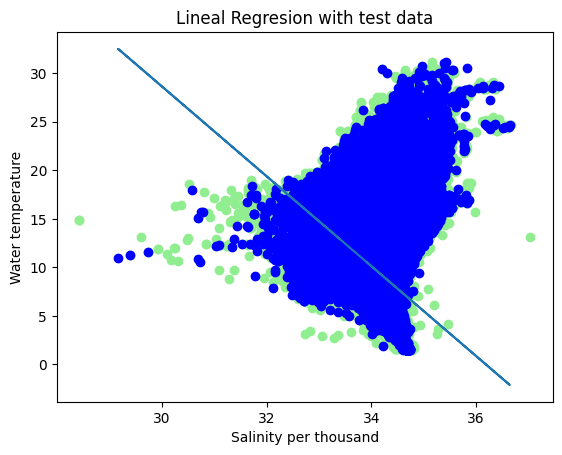

In [45]:
plt.scatter(X_train, y_train, color='#90EE90')
plt.scatter(X_test,y_test,color="blue")
plt.plot(X_test,y_predict)
plt.xlabel("Salinity per thousand")
plt.ylabel("Water temperature")
plt.title('Lineal Regresion with test data')
plt.show()


# Conclusion

I have found that finding the water temperature with just the saliity is inneficient due to the result of the train and test accurancy, for making a more accurare prediction I would need more variables, putting more data of just the salinity will not help either.